## Shopify: Summer 2022 Data Science Intern Challenge 
### By: Sunay Bhat

**a.** The naive Average Order Value calculation is done by taking the mean of all the order values. The issue with this dataset is **large outliers skewing the mean** - our data is not normally distirbuted.\
\
**b.** The simplest option is to **take the median** or mode. More complicated options might include assuming a multi-modal distribution and using a cluter method to extract the AOV for each group. This notebook shows both of those methods\
\
**c.**
* **median** \$284.00
* **mode:** \$153.00 
* **K-means** (3):
  * 1: \$302.58 (Majority of orders: 98.75%)
  * 2: \$49,213.04 (0.92% of orders)
  * 3: \$704,000.00 (0.34% of orders)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# Import and View data characteristics
df_sales = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
print(df_sales.head())
df_sales.nunique()

   order_id  shop_id  user_id  order_amount  total_items payment_method  \
0         1       53      746           224            2           cash   
1         2       92      925            90            1           cash   
2         3       44      861           144            1           cash   
3         4       18      935           156            1    credit_card   
4         5       18      883           156            1    credit_card   

            created_at  
0  2017-03-13 12:36:56  
1  2017-03-03 17:38:52  
2   2017-03-14 4:23:56  
3  2017-03-26 12:43:37  
4   2017-03-01 4:35:11  


order_id          5000
shop_id            100
user_id            301
order_amount       258
total_items          8
payment_method       3
created_at        4991
dtype: int64

### a. Naive Calc issue

In [45]:
print('Naive AOV: ${:.2f}'.format(df_sales['order_amount'].mean()))

Naive AOV: $3145.13


A quick visualization (below) shows that we have a couple modes of very large outliers that can vastly skew the mean. We would want to remove or spearate our data into these modes for better analysis. A quick glance suggests 3-4 clusters, although a long-tail distribution is the most realistic model to consider. 

(0.0, 2000.0)

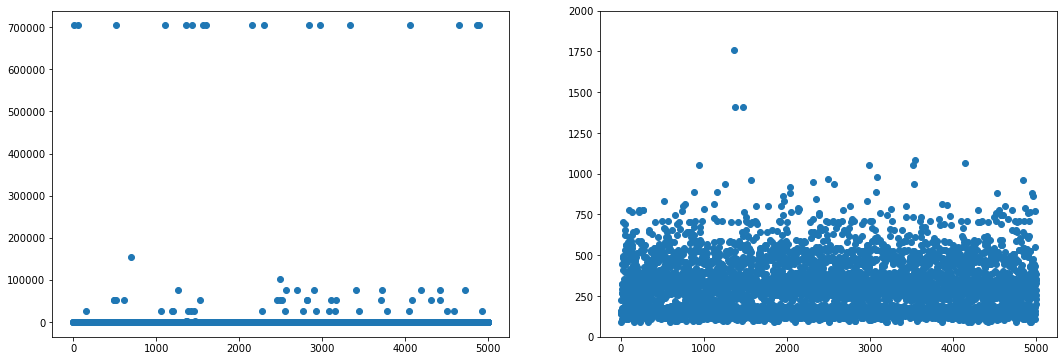

In [71]:
# Naive Calculation is likely an average accross stores, averaged again
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
ax1.scatter(range(df_sales['order_amount'].shape[0]),df_sales['order_amount'])
ax2.scatter(range(df_sales['order_amount'].shape[0]),df_sales['order_amount'])
ax2.set_ylim([0,2000])

### b and c: Alternative Calcs

In [85]:
print('Median AOV: ${:.2f}'.format(df_sales['order_amount'].median()))
print('Mode AOV: ${:.2f}'.format(df_sales['order_amount'].mode()[0]))


Median AOV: $284.00
Mode AOV: $153.00


In [90]:
# K-means, 3 clusters
from sklearn.cluster import KMeans
km = KMeans(3, init='random',n_init=10, max_iter=300,tol=1e-04, random_state=0)
km.fit(df_sales['order_amount'].to_numpy().reshape(-1,1))
km.cluster_centers_

array([[3.02580514e+02],
       [7.04000000e+05],
       [4.92130435e+04]])

In [96]:
# Percent in each cluster
df_sales['kmean'] = km.labels_
df_sales['kmean'].value_counts()/50

0    98.74
2     0.92
1     0.34
Name: kmean, dtype: float64